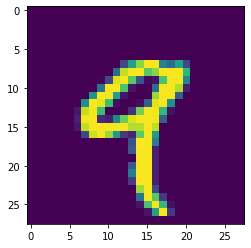

No of Images for digit 0 :  5923
No of Images for digit 1 :  6742
No of Images for digit 2 :  5958
No of Images for digit 3 :  6131
No of Images for digit 4 :  5842
No of Images for digit 5 :  5421
No of Images for digit 6 :  5918
No of Images for digit 7 :  6265
No of Images for digit 8 :  5851
No of Images for digit 9 :  5949
39


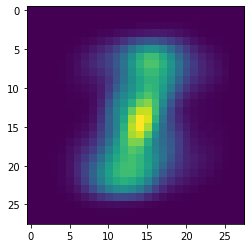

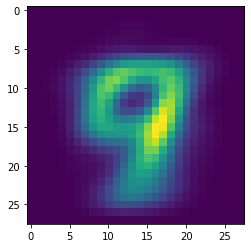

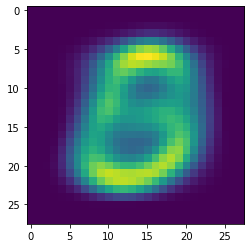

The number of images in cluster 0 is:  21180
The number of images in cluster 1 is:  19412
The number of images in cluster 2 is:  19408
44


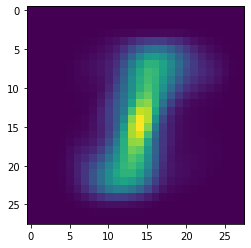

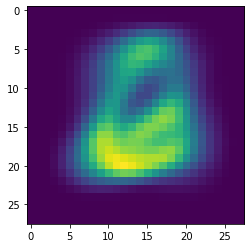

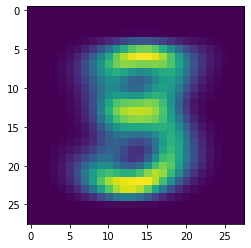

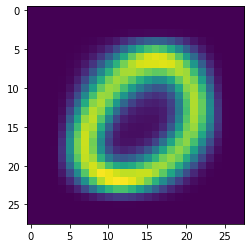

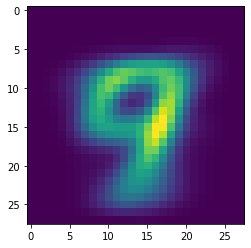

The number of images in cluster 0 is:  13902
The number of images in cluster 1 is:  10799
The number of images in cluster 2 is:  12573
The number of images in cluster 3 is:  5417
The number of images in cluster 4 is:  17309
30


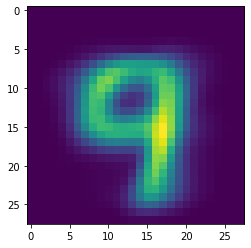

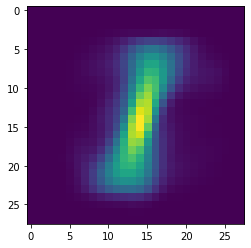

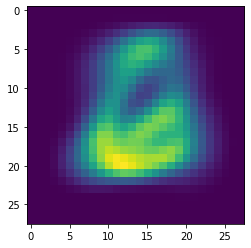

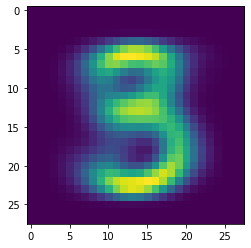

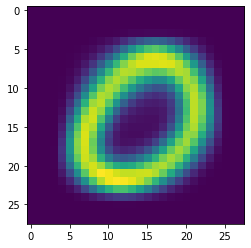

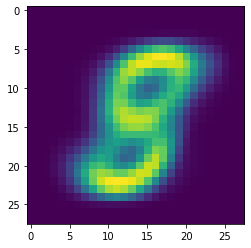

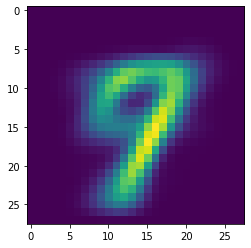

The number of images in cluster 0 is:  9166
The number of images in cluster 1 is:  10958
The number of images in cluster 2 is:  9810
The number of images in cluster 3 is:  8428
The number of images in cluster 4 is:  5068
The number of images in cluster 5 is:  7599
The number of images in cluster 6 is:  8971
100


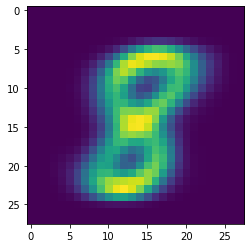

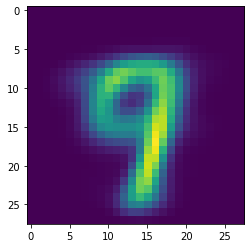

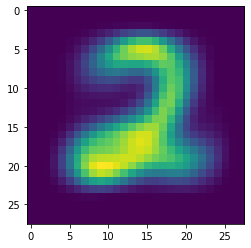

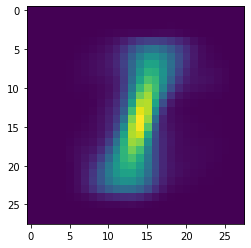

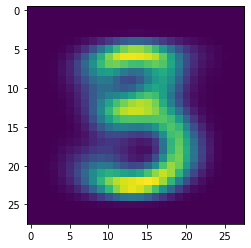

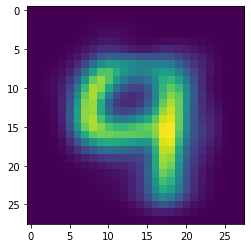

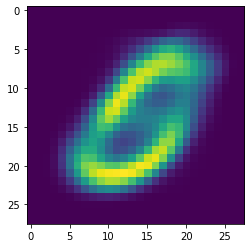

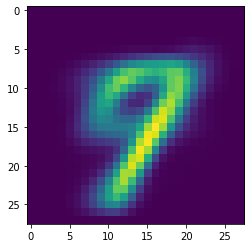

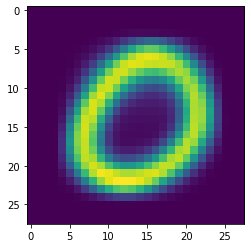

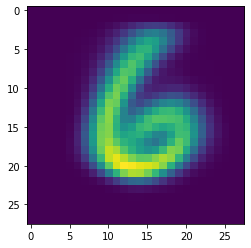

The number of images in cluster 0 is:  5446
The number of images in cluster 1 is:  7205
The number of images in cluster 2 is:  4495
The number of images in cluster 3 is:  10057
The number of images in cluster 4 is:  7444
The number of images in cluster 5 is:  5321
The number of images in cluster 6 is:  4514
The number of images in cluster 7 is:  6482
The number of images in cluster 8 is:  4072
The number of images in cluster 9 is:  4964
100


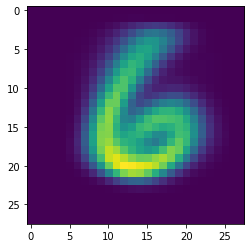

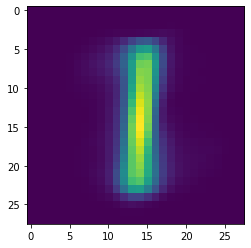

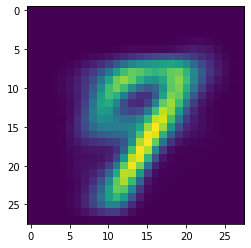

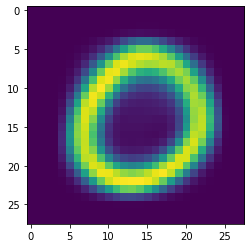

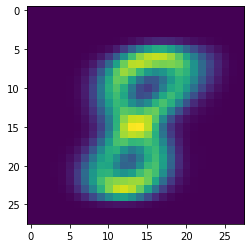

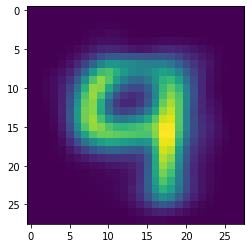

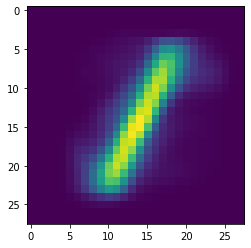

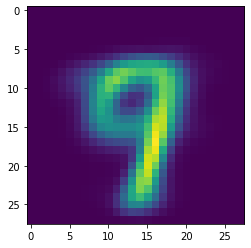

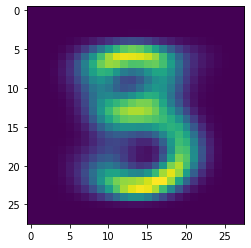

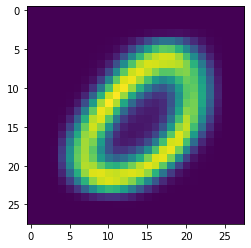

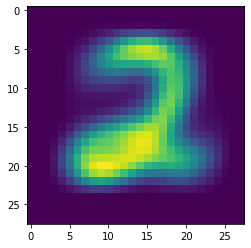

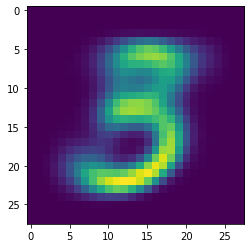

The number of images in cluster 0 is:  5433
The number of images in cluster 1 is:  5291
The number of images in cluster 2 is:  6601
The number of images in cluster 3 is:  2954
The number of images in cluster 4 is:  4732
The number of images in cluster 5 is:  5282
The number of images in cluster 6 is:  5198
The number of images in cluster 7 is:  6952
The number of images in cluster 8 is:  5548
The number of images in cluster 9 is:  2769
The number of images in cluster 10 is:  4504
The number of images in cluster 11 is:  4736


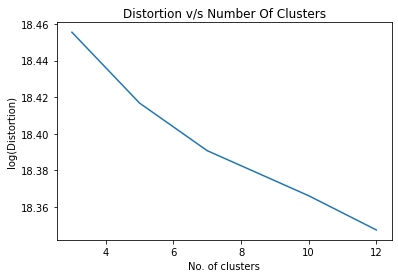

In [ ]:
!pip install mnist
import mnist
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

def compute_centriods(components,clusters,k):
  centriods= np.zeros(shape=(k,components.shape[1]))
  for i in range(k):
    count =0
    sum = np.zeros(shape=(1,components.shape[1]))
    for x in range(len(clusters)):
      if clusters[x]==i:
        count=count+1
        sum = sum + components[x]
    centriods[i]= sum/(count+1)
  return centriods

def distribute(components,centriods,k):
  clusters = [0]* components.shape[0]
  for x in range(components.shape[0]):
    min_norm= LA.norm(components[x]-centriods[0])
    index= 0
    for i in range(1,k):
      norm = LA.norm(components[x]-centriods[i])
      if norm < min_norm:
        min_norm = norm
        index = i
    clusters[x] = index
  return clusters

def distortion(components,clusters,centriods):

  error = 0
  for i in range(components.shape[0]):
    error = error+LA.norm(components[i]- centriods[clusters[i]])
  return error

#Implementing k-mean algorithm
def KMean(components,k):
  #initializing the centriods
  ids = np.random.randint(components.shape[0], size=k)
  centriods = components[ids,:]
  clusters = []
  epoch =0
  max_epoch= 30
  while True:
    clusters = distribute(components,centriods,k)
    count=0
    centriods_new = compute_centriods(components,clusters,k)
    if np.all(centriods_new == centriods) or epoch == max_epoch:
      break
    else:
      centriods = centriods_new
      epoch = epoch+1
  print(epoch)
  return centriods, clusters
  

#loading the dataset from MNIST consists of handwritten digits with labels
train_imgs=mnist.train_images()
train_labels=mnist.train_labels()
test_imgs=mnist.test_images()
test_labels=mnist.test_labels()

imgplot = plt.imshow(train_imgs[4])
plt.show()

#Flattening the images
train_imgs=train_imgs.reshape((-1,784))
test_imgs=test_imgs.reshape((-1,784))

for i in range(10):
  count =0
  for j in train_labels:
    if j== i:
      count= count +1
  print("No of Images for digit",i,": ",count)

n_clusters = [3,5,7,10,12]
#n_clusters = [10]

d_list= []
for k in n_clusters:
  centriods,clusters= KMean(train_imgs,k)
  for c in centriods:
    imgplot = plt.imshow(c.reshape(28,28))
    plt.show()
  for i in range(k):
    count=0
    for j in clusters:
      if j==i:
        count = count+1
    print("The number of images in cluster",i,"is: ",count)
  d_list.append(math.log(distortion(train_imgs,clusters,centriods)))

plt.plot(n_clusters,d_list)
plt.title('Distortion v/s Number Of Clusters')
plt.ylabel('log(Distortion)')
plt.xlabel('No. of clusters')
plt.show()
  
